In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn

In [2]:
artists = pd.read_csv("artists.csv")
artworks = pd.read_csv("artworks.csv")

In [3]:
artworks = artworks.set_index(artworks['Artwork ID'])
artists = artists.set_index(artists['Artist ID'])

In [4]:
def find_year(datestr):
    if datestr is np.nan:
        return -1
    match = re.search('[1-2]\d\d\d', datestr)
    if match is None:
        return -1
    else:
        return int(match.group())

In [5]:
artworks['Year'] = artworks['Date'].apply(find_year).astype(int)

In [6]:
artworks['Acquisition Year'] = artworks['Acquisition Date'].apply(find_year).astype(int)

In [7]:
yearlycount = artworks.groupby('Acquisition Year')['Artwork ID'].count().rename('Count')

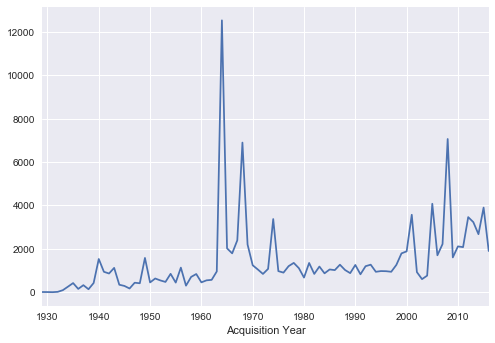

In [8]:
yearlycount.loc[1929:].plot()
plt.show()

In [9]:
years = np.arange(1929,2017)

In [10]:
def kthartist(s, k):
    if s is np.nan or s == '':
        return -1
    if len(s.split(',')) <= k:
        return -1
    return int(s.split(',')[k])

In [11]:
artworks['First Artist ID'] = artworks['Artist ID'].apply(lambda s: kthartist(s, 0))

In [12]:
artworks['Second Artist ID'] = artworks['Artist ID'].apply(lambda s: kthartist(s, 1))

In [13]:
artworks['First Artist Nationality'] = artworks.join(artists['Nationality'], on='First Artist ID')['Nationality']

In [14]:
artworks['Second Artist Nationality'] = artworks.join(artists['Nationality'], on='Second Artist ID')['Nationality']

In [15]:
multiplenationality = artworks.loc[artworks['Second Artist Nationality'].dropna().index][['First Artist Nationality', 'Second Artist Nationality']].dropna()

In [16]:
multiplenationality[multiplenationality['First Artist Nationality'] != multiplenationality['Second Artist Nationality']].count()

First Artist Nationality     1690
Second Artist Nationality    1690
dtype: int64

In [17]:
multiplenationality.count()

First Artist Nationality     5040
Second Artist Nationality    5040
dtype: int64

In [18]:
artworks['Artwork ID'].count()

130262

In [19]:
artworks.to_csv('artworks_processed.csv')

In [20]:
nationalitycount = artworks[['Artwork ID', 'Acquisition Year', 'First Artist Nationality']].groupby(
    ['Acquisition Year', 'First Artist Nationality']).count()['Artwork ID'].rename('Count')

In [21]:
nationalitycount = nationalitycount.replace(np.nan, 0).astype(int).drop(
    [-1,1216], level=0).drop('nationality unknown', level=1)

In [22]:
nationalitycount.to_csv('nationality_count.csv')

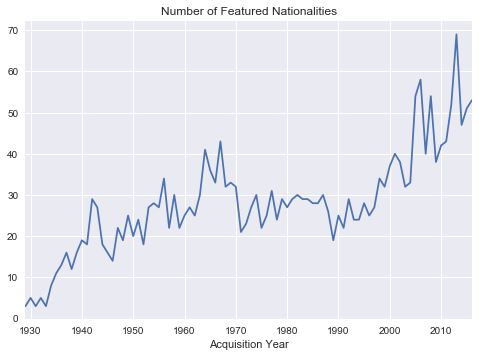

In [23]:
nationalitycount.unstack().count(axis=1).plot()
plt.title('Number of Featured Nationalities')
plt.show()

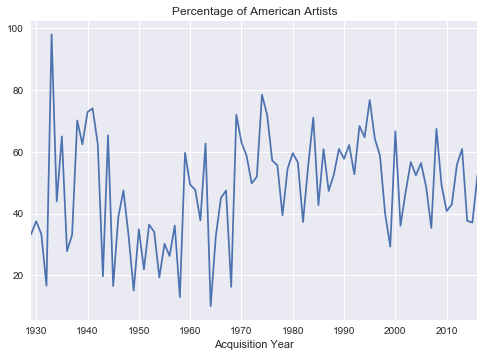

In [24]:
(100.0 * nationalitycount.unstack()['American'] / nationalitycount.unstack().sum(axis=1)).plot()
plt.title('Percentage of American Artists')
plt.show()